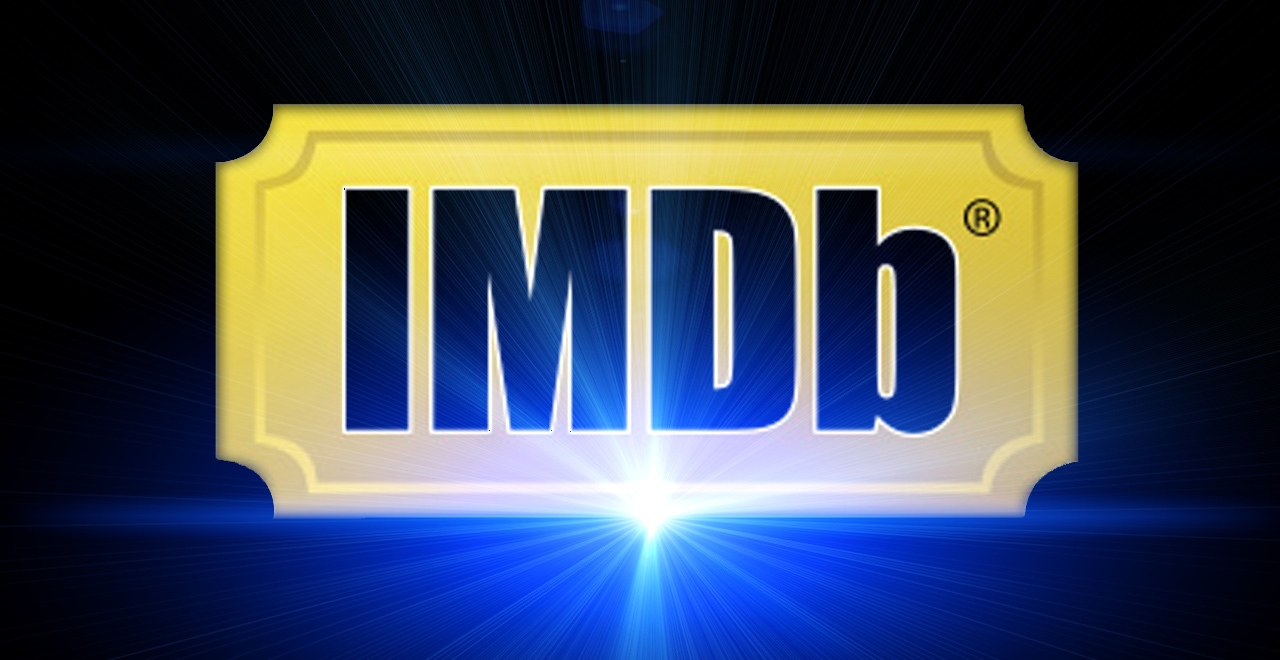

# IMDb Data and Analysis

## Introduction

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
movies = pd.read_csv('./data/imdb_data.csv', sep=',')
movies.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

The data set is a collection of information about movies released after 1970 and currently have over 50,000 ratings. I enjoy watching movies and have used the website IMDb before to get information, which is why I chose this data set. There are twelve colums: 'id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'budget', 'gross', release_date', 'directors.' The movie's ID used by IMDB repository is recorded as 'id'; The movies English title is 'primaryTitle'; Whatever the movie is called in its native langauge is 'originalTitle'; If the movie needs parental guidence iis recorded in 'isAdult'; The average of all the ratings for the movie is 'averageRating'; The total number of ratings is 'numVotes'; The budget in USD is 'budget'; The total money the movie made worldwide in USD is 'gross'.

In [3]:
movies.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0499549,Avatar,Avatar,0,162,"Action,Adventure,Fantasy",7.9,1364568,237000000,2.923706e+09,2009-12-10,James Cameron
1,tt4154796,Avengers: Endgame,Avengers: Endgame,0,181,"Action,Adventure,Drama",8.4,1224453,356000000,2.799439e+09,2019-04-18,"Anthony Russo, Joe Russo"
2,tt1630029,Avatar: The Way of Water,Avatar: The Way of Water,0,192,"Action,Adventure,Fantasy",7.6,466743,350000000,2.320250e+09,2022-12-06,James Cameron
3,tt0120338,Titanic,Titanic,0,194,"Drama,Romance",7.9,1252486,200000000,2.264743e+09,1997-11-01,James Cameron
4,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,0,138,"Action,Adventure,Sci-Fi",7.8,960165,245000000,2.071310e+09,2015-12-14,J.J. Abrams


In [46]:
movies.describe()

,isAdult,runtimeMinutes,averageRating,numVotes,budget,gross
count,3348.0,3348.000000,3348.00000,3.348000e+03,3.348000e+03,3.297000e+03
mean,0.0,112.739845,6.73853,2.155492e+05,5.039280e+07,1.681599e+08
std,0.0,19.927703,0.88221,2.480211e+05,5.178614e+07,2.366507e+08
min,0.0,63.000000,1.00000,5.000400e+04,1.800000e+01,2.100000e+02
25%,0.0,98.000000,6.20000,7.897700e+04,1.500000e+07,3.623022e+07
50%,0.0,109.000000,6.80000,1.290400e+05,3.200000e+07,8.821516e+07
75%,0.0,124.000000,7.30000,2.468495e+05,6.800000e+07,2.008117e+08
max,0.0,242.000000,9.30000,2.817283e+06,3.560000e+08,2.923706e+09


## Adding and Deleting Columns

In [50]:
movies_filtered.groupby('directors')['gross'].mean()

directors
Aaron Blaise, Robert Walker                     2.503978e+08
Aaron Horvath, Michael Jelenic, Pierre Leduc    1.362016e+09
Aaron Nee, Adam Nee                             1.929077e+08
Aaron Seltzer, Jason Friedberg                  8.582331e+07
Aaron Sorkin                                    5.928402e+07
                                                    ...     
Zach Braff                                      6.052193e+07
Zach Cregger                                    4.535234e+07
Zack Snyder                                     3.974306e+08
Zal Batmanglij                                  2.891812e+06
Ömer Faruk Sorak                                2.083905e+07
Name: gross, Length: 1334, dtype: float64

This shows the average budget for directors and movies. 

In [5]:
movies_filtered = movies.copy().dropna()
del movies_filtered['isAdult']
del movies_filtered['id']

I deleted 'isAdult' because all the movies are at least PG and the whole column only has 0 as a value. I also deleted the id number because it is really only used to help IMBd keep track of the movies, no the people watching them. I kept the gross budget even though is it was missing values, because it is important information and the movies without a gross bugdet were mostly Netflix releases and did not premire worldwide. 

<AxesSubplot: >

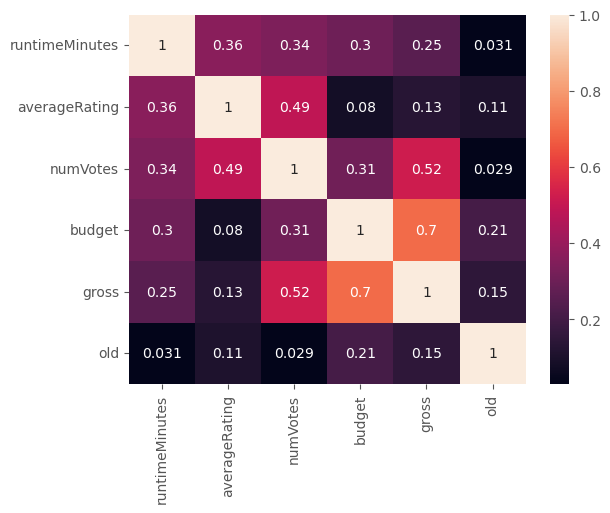

In [6]:
movies_filtered['old'] = 2024 - movies_filtered['release_date'].str[:4].astype(int)
movies_filtered.head()
sns.heatmap(abs(movies_filtered.corr(numeric_only=True)), annot=True)

The heatmap shows the correlation between all the numberical values in the dataset. The highest correlation is between the average budget in USD and the gross budget worldwide in USD, which 

## Statistical Analysis and Graphs

### Fifteen Most Common Directors

<AxesSubplot: xlabel='directors'>

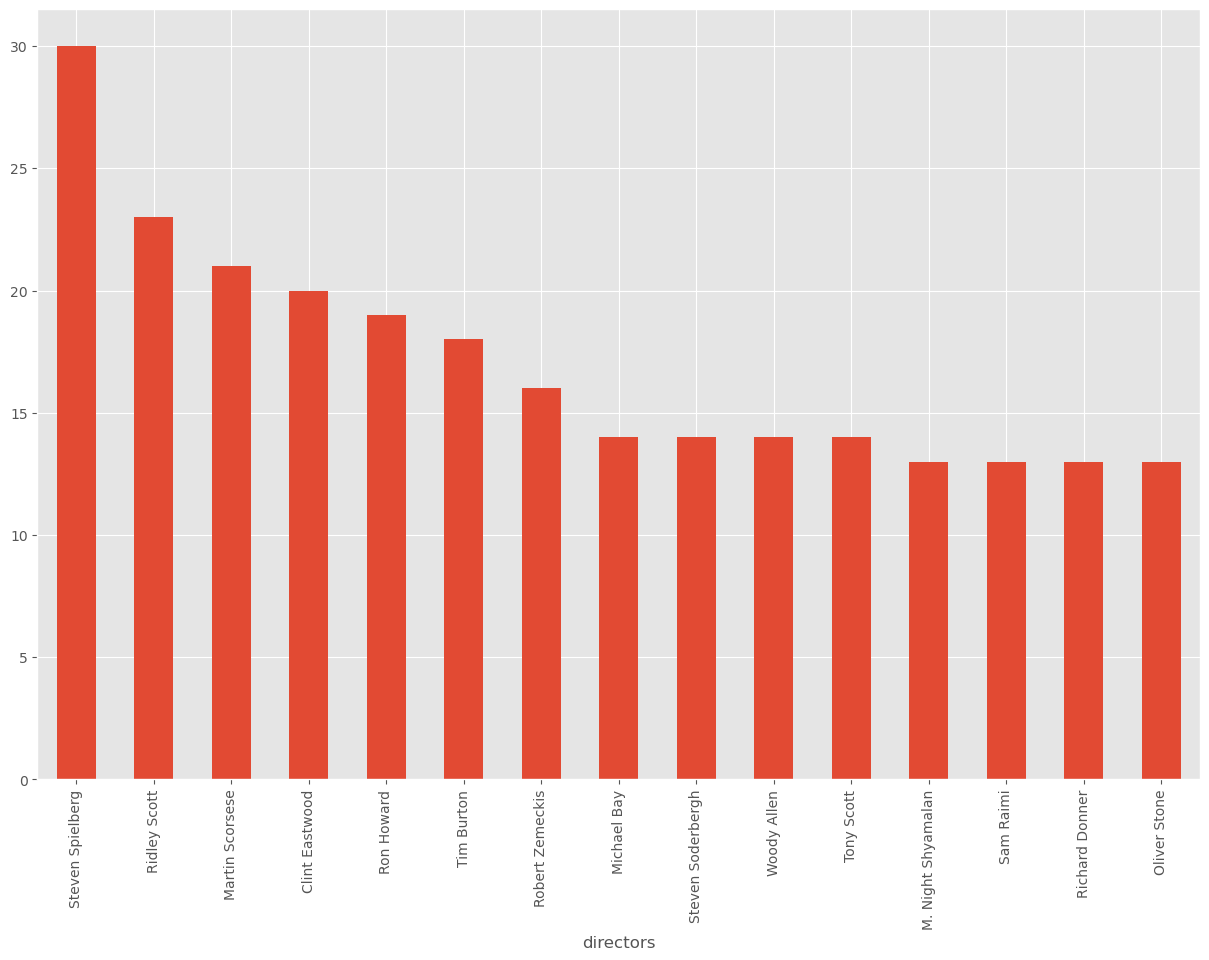

In [31]:
plt.style.use('ggplot')
movies_filtered['directors'].value_counts(sort=True)[:15].plot.bar(figsize=(15,10))

This graph shows the 15 most common directors and how many movies they made. Steven Spielberg made the most with around 30.

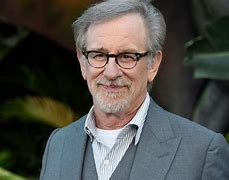

### The Most Common Average Movie Rating 

array([[<AxesSubplot: title={'center': 'averageRating'}>]], dtype=object)

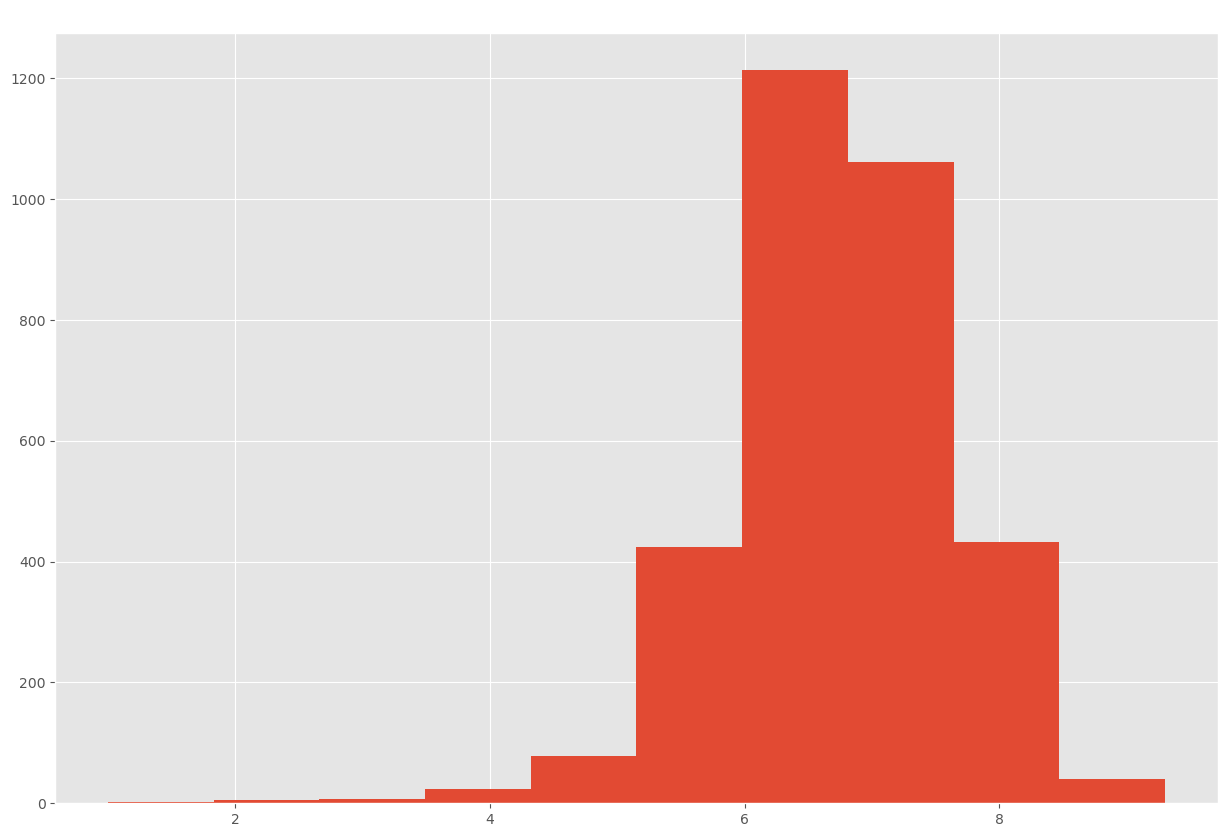

In [9]:
plt.style.use('ggplot')
movies_filtered.hist(column='averageRating', figsize=(15,10))

This histogram shows the average rating for the mpvies on IMBd. The graph is skewed left which means most of the movies had higher rating than 5, the middle value since the score can only go up to 10.

### The Age Range of Movies on IMBd

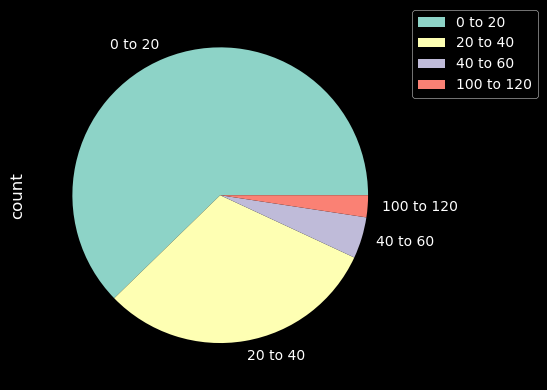

In [10]:
plt.style.use('dark_background')
movies_filtered['age_range'] = pd.cut(x=movies_filtered['old'], bins=[0, 20, 40, 60, 80, 100, 120],
                    labels=['0 to 20', '20 to 40', '40 to 60', '60 to 80', '80 to 100', '100 to 120'])
ax = movies_filtered['age_range'].str.split(',\s*').explode().value_counts().plot(kind='pie')
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

This pie chart shows the age of the movies in ranges of 20 years up to 120 years ago. Most movies were made between 0-20 years ago, and no movies were made from 60 to 100 years ago.

### Age Range Compared to  Budget in USD

<AxesSubplot: xlabel='age_range'>

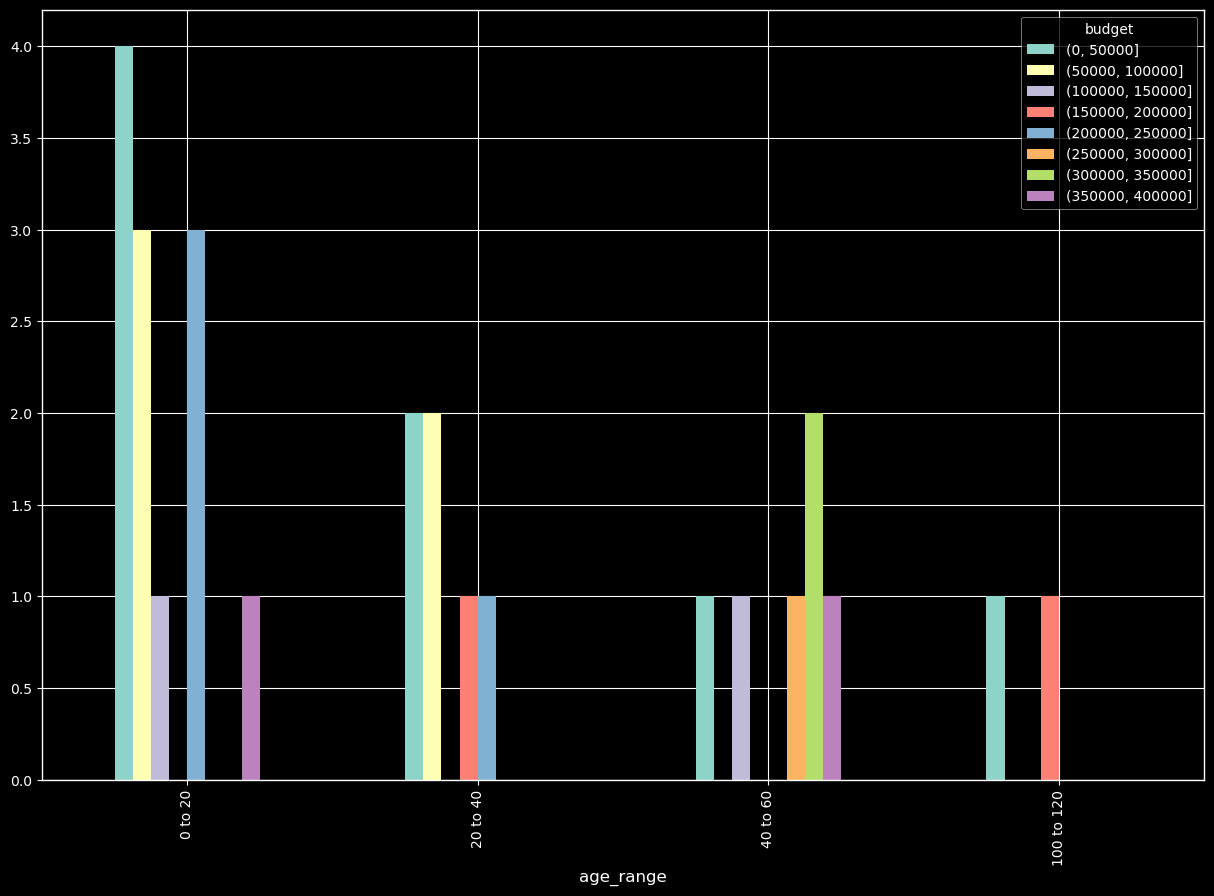

In [39]:
plt.style.use('dark_background')
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
oldmoney = pd.crosstab(movies_filtered['age_range'], pd.cut(movies_filtered['budget'], bins))
oldmoney[:15].plot.bar(figsize=(15,10))

This bar graph shows the budget, per $50,000, of movies in different age ranges 20 years apart. The movies made within the last 20 years have more movies made with a lower budget, between 0-50,500 dollars. In general, older movies were made with less money than the newer movies. 

## Conclusion

Most of the movies on IMBd are more recent and popular. The data set is high-quality, giving most of the basic information someone would want about a movie. Before using the data it would be helpful to delete the isAdult column because it only has 0 as a value, and relise that the gross budget is not available for all the movies. Knowing what data to use for what graphs was the most difficult, but afterwards making the actual graphs went well. 